# **Short Term Electricity Demand Forecasting using Weather Data (Delhi, 5-minute resolution)**

# **EXPLORATORY DATA ANALYSIS**

**1.IMPORT LIBRARIES AND DATA**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("/content/energy_data_cleaned.csv")

In [5]:
data.shape

(393440, 14)

In [6]:
data.isnull().sum()

,0
datetime,0
Power demand,0
temp,0
dwpt,0
rhum,0
wdir,0
wspd,0
pres,0
year,0
month,0


In [7]:
data.head(5)

,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,1999.076667
1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,1999.076667
2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000


2.**TIME-SERIES PLOT**

In [8]:
data["datetime"] = pd.to_datetime(data['datetime'])

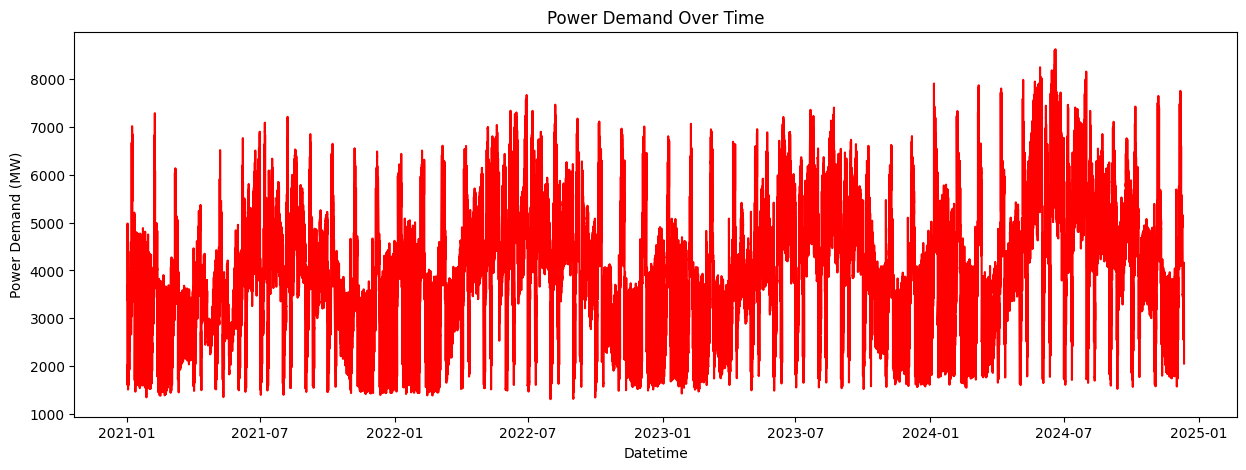

In [9]:
plt.figure(figsize=(15,5))
plt.plot(data['datetime'], data['Power demand'], color='red')
plt.title('Power Demand Over Time')
plt.xlabel('Datetime')
plt.ylabel('Power Demand (MW)')
plt.show()


The plot shows overall power demand over time. The plot indicates Strong daily/weekly cycles the demand spikes and dips show a clear repetitive pattern (likely mornings/evenings).Each year shows repeating demand trends, which is common in energy datasets.

Further,for deeper understandings and trends weekly/yearly/daily demand line are plotted.

2.a.**Daily Trend**

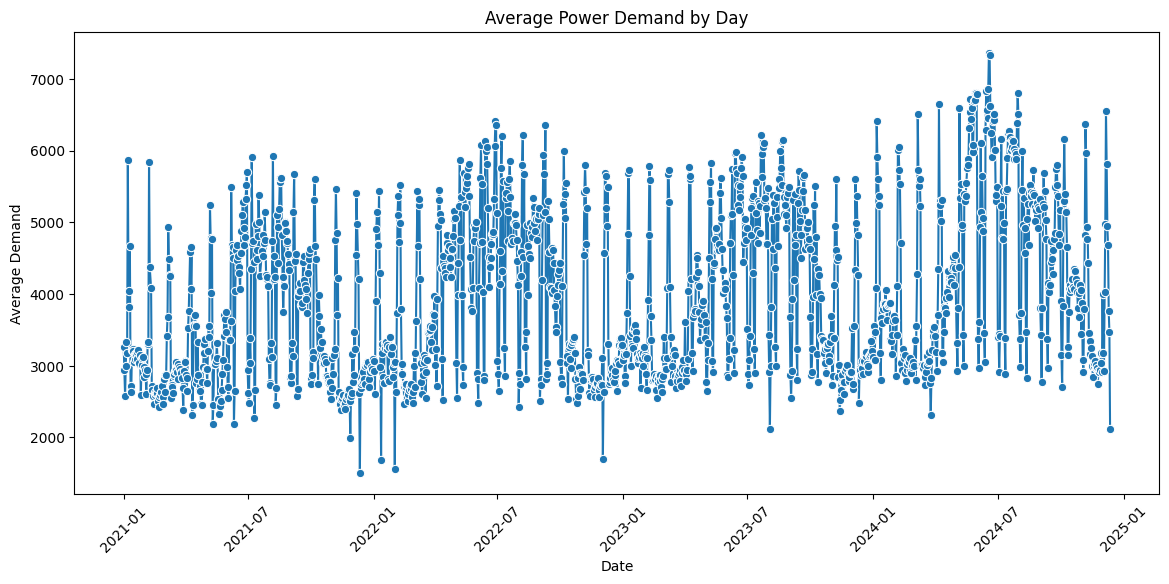

In [10]:
daily = data.groupby(data['datetime'].dt.date)['Power demand'].mean()

plt.figure(figsize=(14,6))
sns.lineplot(x=daily.index, y=daily.values, marker='o')
plt.title('Average Power Demand by Day')
plt.xlabel('Date')
plt.ylabel('Average Demand')
plt.xticks(rotation=45)
plt.show()


The plot reveals each dot as one day's average power demand.The line connecting dots shows the trend across days.Thee plot shows peaks in summer months (likely due to cooling/AC load) and dips in cooler months like seasonal patterns.
Some spikes/drops may indicate special events, holidays, or anomalies in the data.

We can plot to know the trend for daily consumption.i.e good for energy planning and billing.
The highest single load per day are also studied for grid stress and peak demand management.

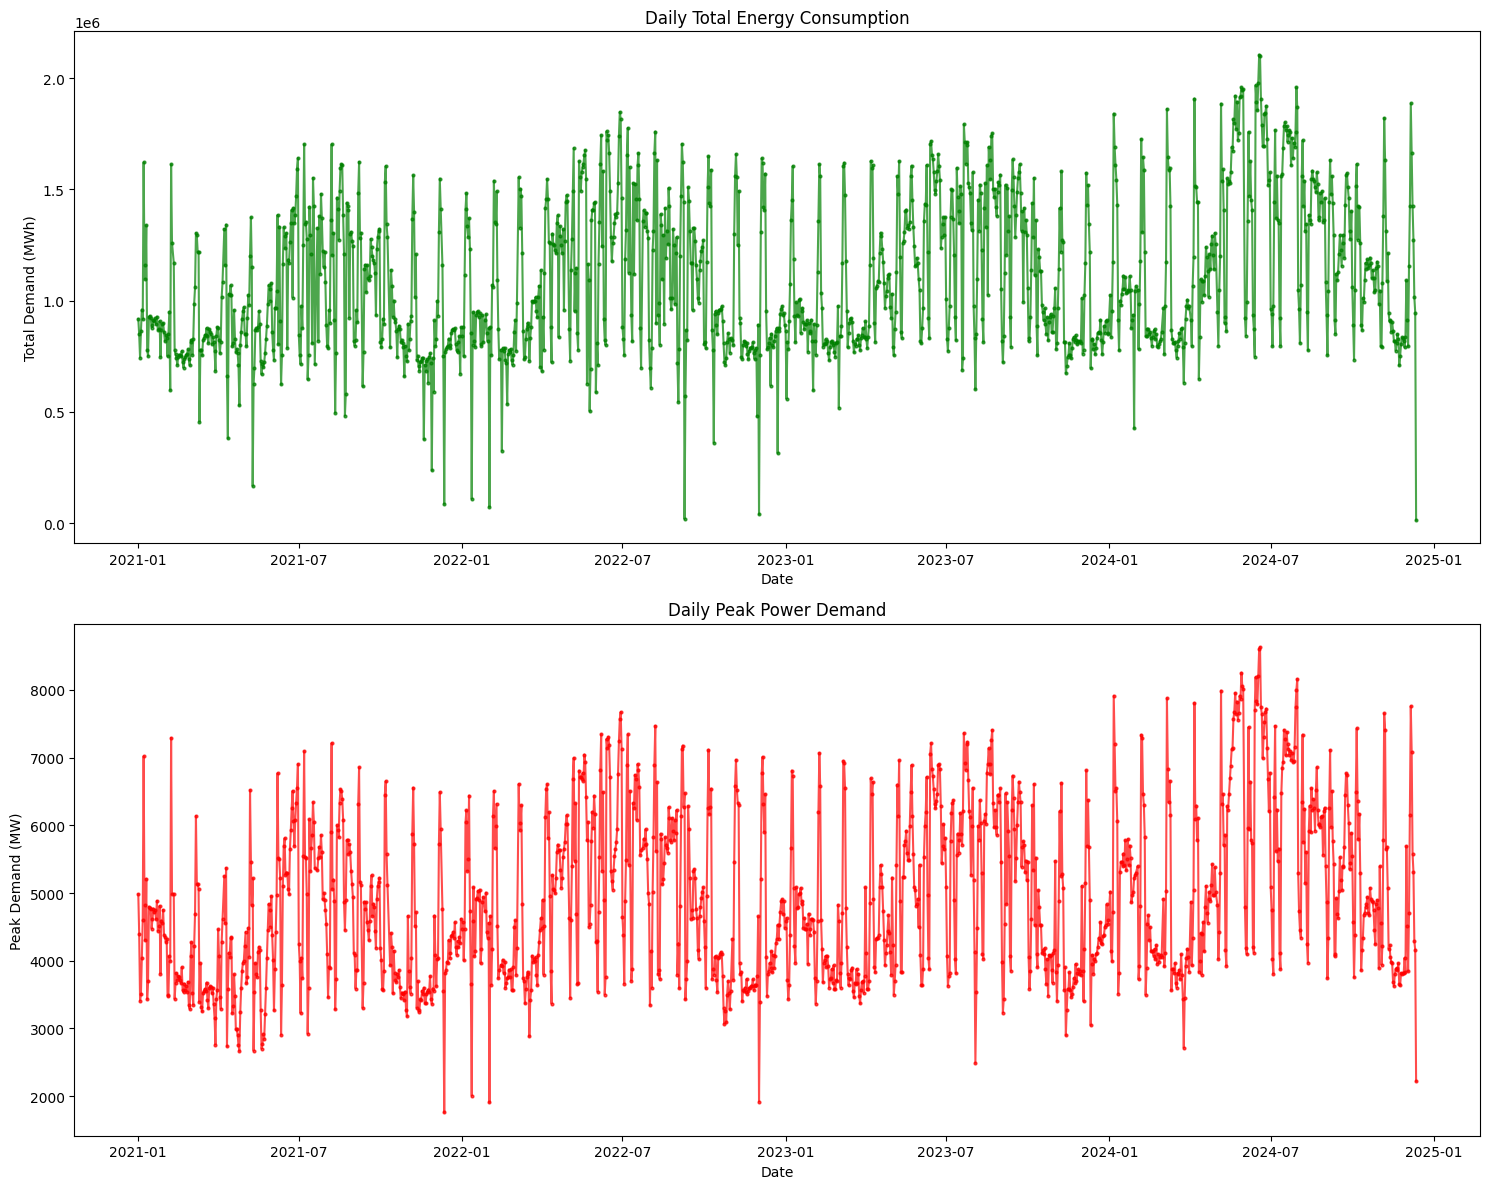

In [11]:
daily_sum = data.groupby(data['datetime'].dt.date)['Power demand'].sum()
daily_peak = data.groupby(data['datetime'].dt.date)['Power demand'].max()
plt.figure(figsize=(15,12))

# Daily Total
plt.subplot(2,1,1)
plt.plot(daily_sum.index, daily_sum.values, marker='o', markersize=2, linestyle='-', alpha=0.7, color='green')
plt.title('Daily Total Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Total Demand (MWh)')

# Daily Peak
plt.subplot(2,1,2)
plt.plot(daily_peak.index, daily_peak.values, marker='o', markersize=2, linestyle='-', alpha=0.7, color='red')
plt.title('Daily Peak Power Demand')
plt.xlabel('Date')
plt.ylabel('Peak Demand (MW)')

plt.tight_layout()
plt.show()

The peak doesn't always move in sync with total consumption because sometimes a high peak comes from a short burst, not sustained demand.The total consumption (green) and peak load (red) both show strong seasonality (rises in summer, dips in cooler months)

2.b. **Weekly Trend**

/tmp/ipython-input-3383357920.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly.index, y=weekly.values, palette='coolwarm')


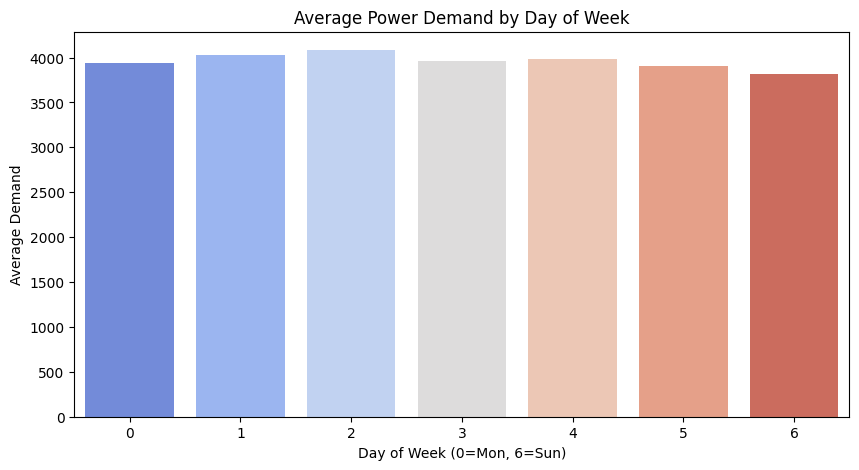

In [12]:
weekly = data.groupby(data['datetime'].dt.dayofweek)['Power demand'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=weekly.index, y=weekly.values, palette='coolwarm')
plt.title('Average Power Demand by Day of Week')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Average Demand')
plt.show()


Mid-week from tuesday to wednesday seems to have slightly higher demand than weekends.
Weekends like saturady and sunday show a dip in demand, which makes sense for industrial loads being lower.

2.c. **Monthly Trend**

/tmp/ipython-input-3849010187.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly.index, y=monthly.values, palette='magma')


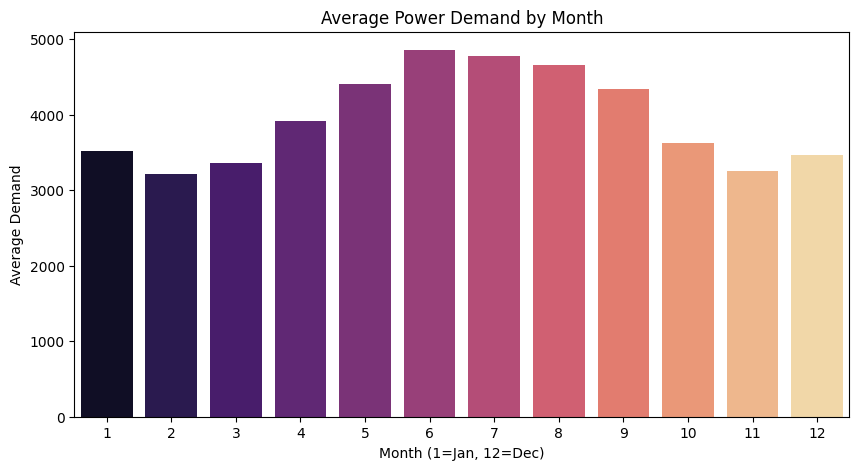

In [13]:
monthly = data.groupby(data['datetime'].dt.month)['Power demand'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=monthly.index, y=monthly.values, palette='magma')
plt.title('Average Power Demand by Month')
plt.xlabel('Month (1=Jan, 12=Dec)')
plt.ylabel('Average Demand')
plt.show()


Average Power Demand by Month, the demand is lowest in February to March and rises to a peak in June, then drops again from October to November.

2.d. **Yearly Trend**

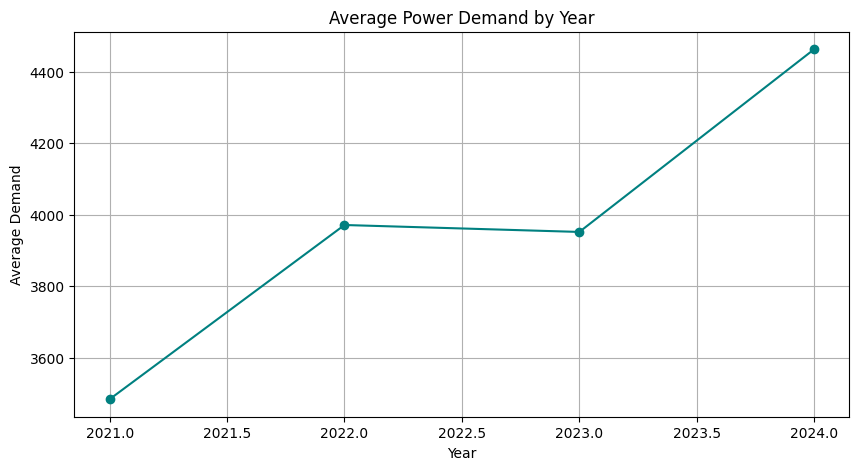

In [14]:
# Group by year and calculate average demand
yearly_demand = data.groupby(data['datetime'].dt.year)['Power demand'].mean()

# Plot
plt.figure(figsize=(10,5))
plt.plot(yearly_demand.index, yearly_demand.values, marker='o', linestyle='-', color='teal')
plt.title('Average Power Demand by Year')
plt.xlabel('Year')
plt.ylabel('Average Demand')
plt.grid(True)
plt.show()


Th plot shows the increase in demand over the years from 2021 . There is slight dip between the years 2022 to 2023. But  again demand has increased in 2024.


**3.CORRELATION WITH WEATHER VARIABLES**

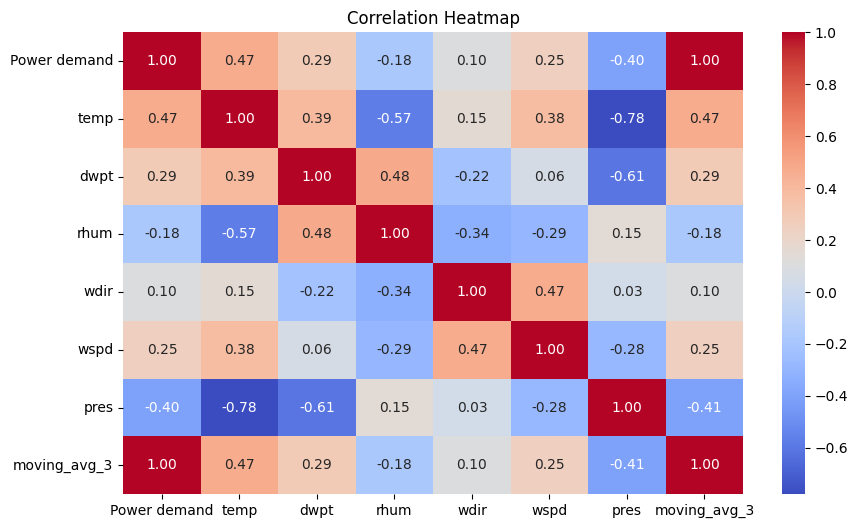

In [15]:
# Select relevant numeric columns
cols = ['Power demand', 'temp', 'dwpt', 'rhum', 'wdir', 'wspd', 'pres','moving_avg_3']

# Compute correlation
corr = data[cols].corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


The corrrelation map is plotted to analyze the target influence on the various numeric columns here weather variable are considered.Here we used temperature,dewpoint,wind direction,wind speed,pressure to see the correlation with the target variable power demand.

**Temperature (temp)**
shows moderate positive correlation,higher temperature results in more AC load which leads to higher demand.

**Relative Humidity (rhum)**
The relative humidity shows weak negative correlation.When humidity is high, demand decreases a little.Humid weather usually coincides with lower temperatures in some seasons.

**Dew Point(dwpt)** shows weak positive correlation.Higher dew point slightly increases demand, but not as strongly as temperature.

**Wind Direction (wdir)** shows very weak positive correlation.Almost negligible indicates wind direction doesn't affect demand much.

**Wind Speed (wspd)** shows weak positive correlation
Slightly higher demand with higher wind speed, but not very significant.Strong winds may cool air, reducing demand a little.

**Pressure (pres)** shows moderate negative correlation.
Lower atmospheric pressure is associated with higher demand. This might be an indirect effect i.e low pressure results in hotter and stormy weather demands more cooling load.
Usually very weak or negative correlation i.e pressure doesn't directly affect electricity use.

**moving_avg_3**
Very high positive correlation, since it is derived directly from demand.

Therefore Temp,pressure,dewpoint have influence on the target.Humidity & wind are weak influences.These features are considered for modelling.
Moving average shouldn't be used as a feature since data leakage may be possible.

4.**MOVING AVERAGES AND TREND**

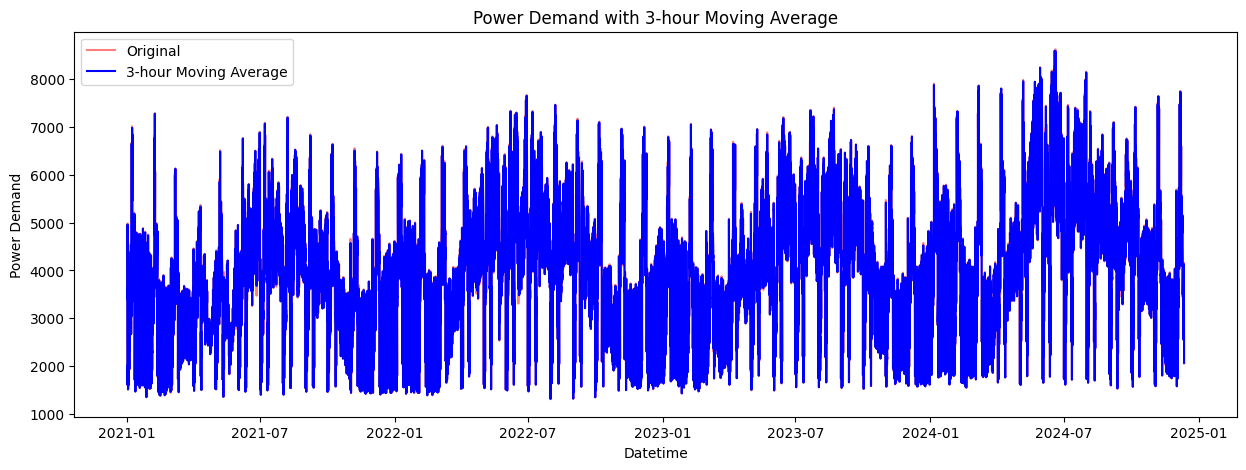

In [18]:
plt.figure(figsize=(15,5))
plt.plot(data['datetime'], data['Power demand'], label='Original', alpha=0.5,color='red')
plt.plot(data['datetime'], data['moving_avg_3'], label='3-hour Moving Average', color='blue')
plt.title('Power Demand with 3-hour Moving Average')
plt.xlabel('Datetime')
plt.ylabel('Power Demand')
plt.legend()
plt.show()


The graph shows the original power demand (red line) along with the 3-hour moving average (blue line).
Power demand has a strong cyclical pattern, with frequent peaks and drops over time.
Seasonal variations are visible i.e demand increases in certain months.
The moving average acts as a baseline trend indicator, useful for forecasting.

**3hours,12hours,2hours moving average Vs Original:**

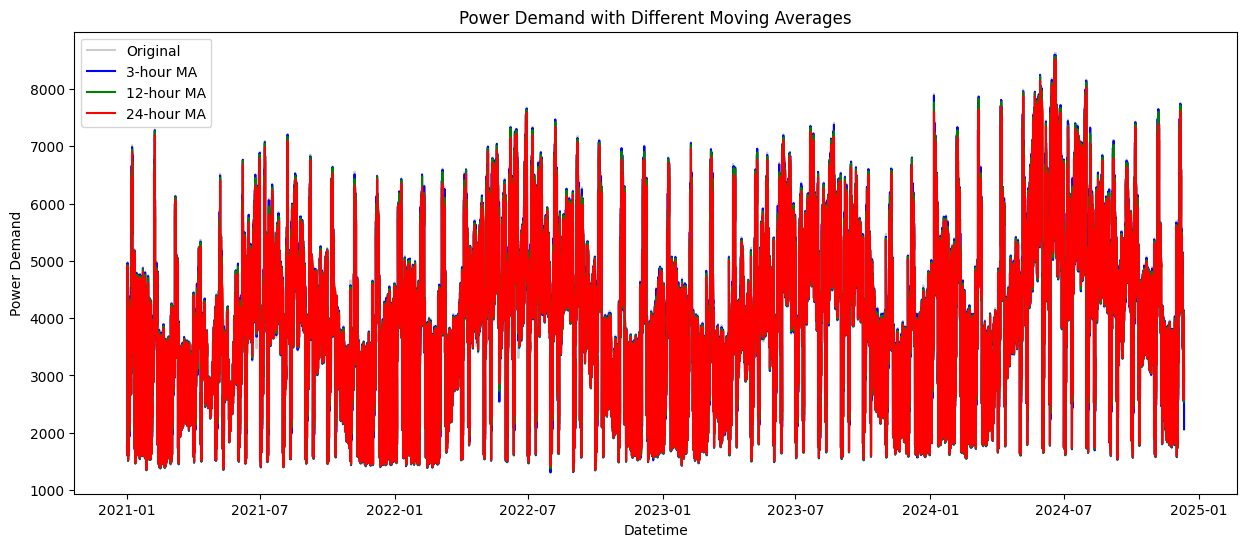

In [19]:


# Create moving averages with different window sizes
data['moving_avg_3'] = data['Power demand'].rolling(window=3).mean()
data['moving_avg_12'] = data['Power demand'].rolling(window=12).mean()
data['moving_avg_24'] = data['Power demand'].rolling(window=24).mean()

# Plot
plt.figure(figsize=(15,6))
plt.plot(data['datetime'], data['Power demand'], label='Original', alpha=0.4, color='gray')
plt.plot(data['datetime'], data['moving_avg_3'], label='3-hour MA', color='blue')
plt.plot(data['datetime'], data['moving_avg_12'], label='12-hour MA', color='green')
plt.plot(data['datetime'], data['moving_avg_24'], label='24-hour MA', color='red')

plt.title('Power Demand with Different Moving Averages')
plt.xlabel('Datetime')
plt.ylabel('Power Demand')
plt.legend()
plt.show()


Insights:

Daily cycles are visible showing higher demand during certain hours of the day.

Seasonal variations i.e yearly patterns remain noticeable across all averages.

Moving averages are useful in forecasting because they help identify baseline demand trends while filtering out short spikes.

3-hour MA can beuseful for short-term forecasting.

12-hour MA captures daily variations can be good for day-ahead prediction.

24-hour MA useful for trend detection and seasonality adjustment.

**1 Day MA & 7 Day MA Vs Original:**

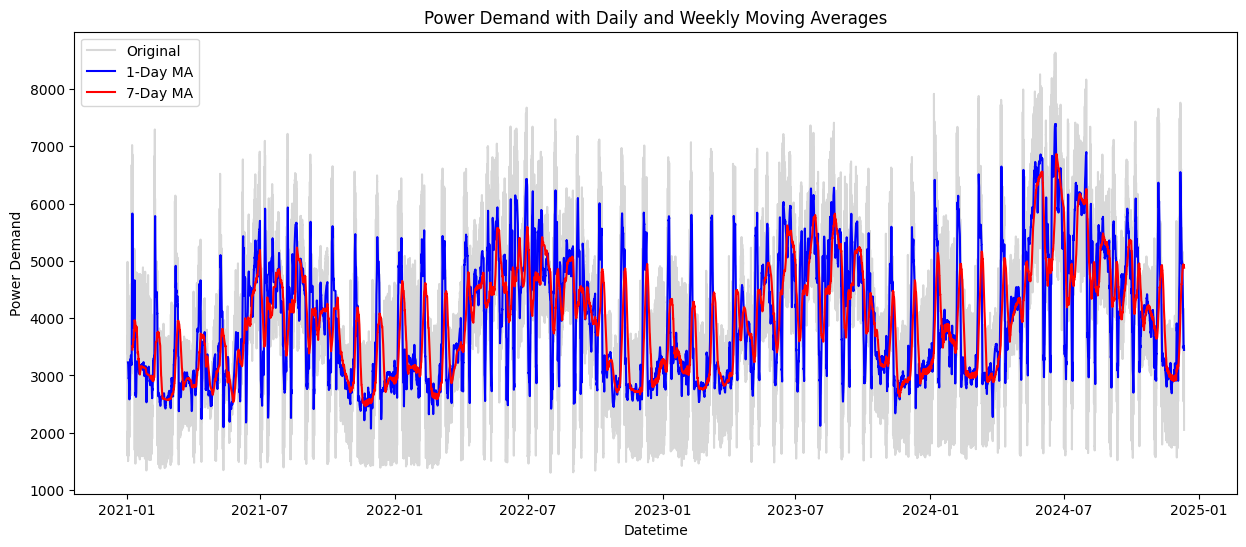

In [20]:
data['MA_1d'] = data['Power demand'].rolling(window=288).mean()   # Daily avg
data['MA_7d'] = data['Power demand'].rolling(window=2016).mean()  # Weekly avg

plt.figure(figsize=(15,6))
plt.plot(data['datetime'], data['Power demand'], label='Original', alpha=0.3, color='gray')
plt.plot(data['datetime'], data['MA_1d'], label='1-Day MA', color='blue')
plt.plot(data['datetime'], data['MA_7d'], label='7-Day MA', color='red')
plt.title('Power Demand with Daily and Weekly Moving Averages')
plt.xlabel('Datetime')
plt.ylabel('Power Demand')
plt.legend()
plt.show()


Daily average can be useful for understanding day-to-day demand changes.Weekly average reveals overall consumption patterns, removing daily spikes.Helps utilities in medium-term planning i.e weekly scheduling of resources.